In [1]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import warnings
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import numpy as np 
import pandas as pd
import string
import re
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from collections import Counter,OrderedDict
from gensim import models,corpora
from gensim.summarization import summarize,keywords
import warnings
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim
import gensim.models.phrases as gen
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings('ignore')

# Деректерді Жүктеу

In [2]:
data=pd.read_csv('dataset/tengri.csv')
len(data)

1980

In [3]:
data.head(5)

,url,title,text
0,https://kaz.tengrinews.kz/crime/korganyis-mini...,Қорғаныс министрлігінің генералы пара алғаны ү...,\nҚР Қорғаныс министрлігі Кадр және әскери біл...
1,https://kaz.tengrinews.kz/crime/shko-da-ek-tur...,"ШҚО-да екі тұрғын алаяққа сеніп, 23 миллион те...",\nШығыс Қазақстан облысында екі тұрғын алаяққа...
2,https://kaz.tengrinews.kz/crime/oralda-dene-sh...,Оралда дене шынықтыру мұғалімі мүгедек балалар...,\nОрал интернатында мүгедек балаларды доппен ұ...
3,https://kaz.tengrinews.kz/events/kostanay-obly...,Қостанай облысында 30 тонна қарбыз тиелген Кам...,\nҚостанай облысында үш көлік жол апатына ұшыр...
4,https://kaz.tengrinews.kz/crime/semeyde-mektep...,"Семейде мектеп есепшісі 3,2 миллион теңге жымқ...",\nСемейде мектептің бас есепшісі үш миллион те...


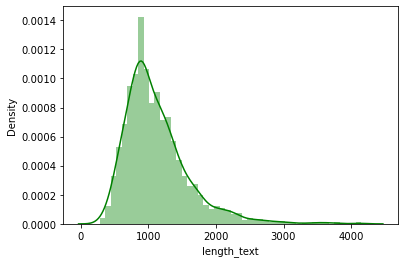

In [4]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="g")
plt.show()

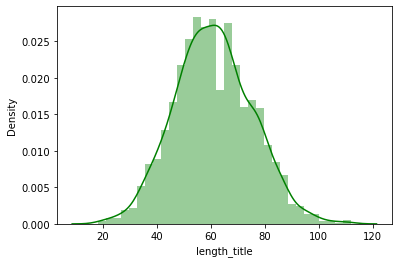

In [5]:
data['length_title'] = data['title'].str.len()
sns.distplot(data['length_title'], color="g")
plt.show()

In [6]:
titles = [x for x in data['title']]
docs = [x for x in data['text']]

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('kazakh')
stop_words[:10]

['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'тағыда', 'әрине', 'жоқ']

# Деректерді алдын-ала өңдеу
Біз Wordnet NLTK-ті сөздердің мағынасын, синонимдерін, антонимдерін және басқаларын табу үшін қолданамыз. Сонымен қатар, біз түбір сөзді алу үшін WordNetLemmatizer қолданамыз.

In [8]:
# Мәтінді тақырыптық модельдеуге дайындау функциясы
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [9]:
docs = [words(x) for x in data['text']]

In [10]:
dictionary = Dictionary(docs)
print('Бастапқы құжаттардағы сөздер саны:', len(dictionary))

# 10 құжаттан аз немесе құжаттардың 20% - дан көп кездесетін сөздерді сүзгіден өткізіміз
dictionary.filter_extremes(no_below=2, no_above=0.1)
print('Сирек және жалпы сөздерді жойғаннан кейінгі ерекше сөздер саны:', len(dictionary))

Бастапқы құжаттардағы сөздер саны: 27770
Сирек және жалпы сөздерді жойғаннан кейінгі ерекше сөздер саны: 11999


In [11]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
bow_doc_300 = corpus[10]

for i in range(len(bow_doc_300)):
    print("Сөз {} (\"{}\") {} рет кездесті.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))

Сөз 55 ("айта") 1 рет кездесті.
Сөз 85 ("кетейік") 1 рет кездесті.
Сөз 152 ("жауып") 2 рет кездесті.
Сөз 180 ("тартылды") 1 рет кездесті.
Сөз 216 ("жүргізуші") 1 рет кездесті.
Сөз 221 ("көлігінің") 1 рет кездесті.
Сөз 351 ("желтоқсанда") 1 рет кездесті.
Сөз 427 ("алмай") 1 рет кездесті.
Сөз 434 ("бірінде") 1 рет кездесті.
Сөз 441 ("иесі") 1 рет кездесті.
Сөз 499 ("тастаған") 2 рет кездесті.
Сөз 522 ("видеосы") 1 рет кездесті.
Сөз 564 ("corolla") 1 рет кездесті.
Сөз 565 ("toyota") 1 рет кездесті.
Сөз 566 ("авторының") 1 рет кездесті.
Сөз 567 ("аек") 1 рет кездесті.
Сөз 568 ("айыппұл") 2 рет кездесті.
Сөз 569 ("арасында") 1 рет кездесті.
Сөз 570 ("ауданында") 1 рет кездесті.
Сөз 571 ("аулалардың") 1 рет кездесті.
Сөз 572 ("аулаға") 2 рет кездесті.
Сөз 573 ("бап") 1 рет кездесті.
Сөз 574 ("беру") 1 рет кездесті.
Сөз 575 ("бірі") 1 рет кездесті.
Сөз 576 ("бұзушылық") 1 рет кездесті.
Сөз 577 ("бұзған") 1 рет кездесті.
Сөз 578 ("видео") 1 рет кездесті.
Сөз 579 ("видеода") 1 рет кездесті.
Сөз

# LDA көмегімен тақырыптық модельдеу
LDA Дирихлеттің жасырын таралуы-ықтималды модель. Бұл машинаны бақылаусыз оқыту әдісі. Кластерлік тағайындауларды алу үшін ол екі ықтималдық мәнін қолданады: P(сөз|тақырыптар) және P(тақырыптар|құжаттар).

pyLDAvis пайдаланушыларға мәтіндік деректер корпусына бейімделген тақырыптық модельдегі тақырыптарды түсіндіруге көмектесу үшін жасалған. Пакет интерактивті веб-визуализация жасау үшін орнатылған Lda тақырыптық моделінен ақпарат алады.

Көпіршіктің мөлшері деректерге қатысты тақырыптардың маңыздылығын өлшейді.
5 немесе 10 тақырып болған кезде біз кейбір тақырыптардың бір-біріне топтастырылғанын көре аламыз (қабаттасқан көпіршіктер), бұл тақырыптардың ұқсастығын көрсетеді.

In [123]:
def get_lda_topics_1(topics):
    word_dict = {};
    for i, words in enumerate(topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(word_dict)

def get_lda_topics_2(model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

In [126]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=500,
                                            passes=20,
                                            alpha = 5,
                                            per_word_topics=True)

In [127]:
get_lda_topics_2(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,видео,өрт,ақша,бабының,сыбайлас,қарағанды,қыз,есірткі,бала,мүмкін
1,kris,жүргізушісі,жалған,аталған,жемқорлыққа,карантин,ұрып,үй,көмек,қашып
2,болады,тжд,уақытша,кодекстің,қызмет,адамдар,қызды,ұқк,қазір,екенін
3,pdt,жүргізуші,сатып,тексеру,мемлекеттік,павлодар,рет,салынған,балалар,айта
4,almaty,тапты,изоляторына,атырау,алды,жергілікті,анасы,ұлттық,баланың,кетейік
5,мас,те,іздестіру,комитетінің,пара,хаттама,кәмелетке,табылды,шыққан,алдында
6,қағып,алдын,алаяқтық,жауапкершілікке,күдікке,шешім,қыздың,қауіпсіздік,үйдің,ақпарат
7,жарияланды,газ,ұсталған,сұлтан,орынбасары,атап,толмаған,нәтижесінде,жағдайы,ақпанда
8,түсіп,метр,қамалды,нің,жылдың,бақылау,айтып,ірі,ауылында,болмаған
9,видеоға,орнында,амалдары,дерегі,бұрынғы,шымкент,әйелдің,алынды,ауруханаға,жаңа


In [128]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [129]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.039093 -0.247837       1        1  11.044356
8     -0.148510 -0.017141       2        1  10.506901
4      0.190249  0.032152       3        1  10.273083
1     -0.196372  0.233846       4        1  10.271833
2      0.210958  0.009348       5        1  10.253666
9      0.005231 -0.205317       6        1  10.066943
0     -0.231717 -0.020056       7        1   9.994102
5     -0.008128 -0.032491       8        1   9.393003
3      0.154988  0.068233       9        1   9.220036
7      0.062394  0.179263      10        1   8.976078, topic_info=           Term        Freq       Total Category  logprob  loglift
561         өрт  405.000000  405.000000  Default  30.0000  30.0000
1858       бала  298.000000  298.000000  Default  29.0000  29.0000
38     сыбайлас  252.000000  252.000000  Default  28.0000  28.0000
1404    есірткі  222.000000  222.000000  Default  27.0000  27.0000
241        ақша  223.000000  223.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
809   іздестіру   60.628003  185.090004  Topic10  -5.4240   1.2945
106      сұлтан   55.985398  196.238261  Topic10  -5.5037   1.1564
109     тексеру   56.259607  205.483794  Topic10  -5.4988   1.1152
904    ұсталған   53.682324  167.606978  Topic10  -5.5457   1.2721
969       өкілі   52.581690  134.920760  Topic10  -5.5664   1.4683

[628 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2998      6  0.956563     air
512       7  0.992513  almaty
2823      7  0.951278     bmw
513       7  0.994686    kris
514       7  0.985789  online
...     ...       ...     ...
563       4  0.995505  өрттің
308      10  0.994518  өткізу
472       2  0.105521    өтіп
472       6  0.039570    өтіп
472       7  0.844169    өтіп

[1440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 2, 3, 10, 1, 6, 4, 8])

Жоғарыда модельдеу тақырыбының визуалды көрінісі, ал төменде қарапайым көрініс берілген және біз әр тақырыпта көрсетілетін #сөздерді көрсете аламыз.

In [122]:
import numpy as np
import time
import re

class LdaGibbsSamplingModel():
    def __init__(self, documents, K = 10, alpha = 5, beta = 0.1, iterationNum = 50):
        self.K = K
        Z = []
        docs, word2id, self.id2word = self.preprocessing(documents)
        N = len(docs)
        M = len(word2id)
        ndz = np.zeros([N, K]) + alpha
        nzw = np.zeros([K, M]) + beta
        nz = np.zeros([K]) + M * beta
        
        ndz, nzw, nz, Z = self.randomInitialize(docs, ndz, nzw, nz, Z)
        
        for i in range(0, iterationNum):
            ndz, nzw, nz, Z = self.gibbsSampling(docs, ndz, nzw, nz, Z)
            print(time.strftime('%X'), "Iteration: ", i, " Completed", " Perplexity: ", self.perplexity(docs, ndz, nzw, nz))
        self.ndz = ndz
        self.nzw = nzw
        self.nz = nz
        
    def get_topicwords(self, k_words=10):
        topicwords = []
        for z in range(0, self.K):
            ids = self.nzw[z, :].argsort()
            topicword = []
            for j in ids:
                topicword.insert(0, self.id2word[j])
            topicwords.append(topicword[0 : k_words])
        return topicwords
    
    def preprocessing(self, documents):
        word2id = {}
        id2word = {}
        docs = []
        currentDocument = []
        currentWordId = 0
        for document in documents:
            for word in document: 
                word = word.lower().strip()
                if len(word) > 1 and not re.search('[0-9]', word):
                    if word in word2id:
                        currentDocument.append(word2id[word])
                    else:
                        currentDocument.append(currentWordId)
                        word2id[word] = currentWordId
                        id2word[currentWordId] = word
                        currentWordId += 1
            docs.append(currentDocument);
            currentDocument = []
        return docs, word2id, id2word

    def randomInitialize(self, docs, ndz, nzw, nz, Z):
        for d, doc in enumerate(docs):
            zCurrentDoc = []
            for w in doc:
                pz = np.divide(np.multiply(ndz[d, :], nzw[:, w]), nz)
                z = np.random.multinomial(1, pz / pz.sum()).argmax()
                zCurrentDoc.append(z)
                ndz[d, z] += 1
                nzw[z, w] += 1
                nz[z] += 1
            Z.append(zCurrentDoc)
        return ndz, nzw, nz, Z

    def gibbsSampling(self, docs, ndz, nzw, nz, Z):
        for d, doc in enumerate(docs):
            for index, w in enumerate(doc):
                z = Z[d][index]
                ndz[d, z] -= 1
                nzw[z, w] -= 1
                nz[z] -= 1
                pz = np.divide(np.multiply(ndz[d, :], nzw[:, w]), nz)
                z = np.random.multinomial(1, pz / pz.sum()).argmax()
                Z[d][index] = z
                ndz[d, z] += 1
                nzw[z, w] += 1
                nz[z] += 1
        return ndz, nzw, nz, Z

    def perplexity(self, docs, ndz, nzw, nz):
        nd = np.sum(ndz, 1)
        n = 0
        ll = 0.0
        for d, doc in enumerate(docs):
            for w in doc:
                ll = ll + np.log(((nzw[:, w] / nz) * (ndz[d, :] / nd[d])).sum())
                n = n + 1
        return np.exp(ll/(-n))

In [124]:
%%time
lda_model_gibbs = LdaGibbsSamplingModel(documents = docs, iterationNum = 20)

02:20:35 Iteration:  0  Completed  Perplexity:  3376.2890114528923
02:20:42 Iteration:  1  Completed  Perplexity:  3355.7003273550345
02:20:50 Iteration:  2  Completed  Perplexity:  3335.6815907631535
02:20:57 Iteration:  3  Completed  Perplexity:  3313.6500775865543
02:21:04 Iteration:  4  Completed  Perplexity:  3288.642352782455
02:21:12 Iteration:  5  Completed  Perplexity:  3261.74079930791
02:21:19 Iteration:  6  Completed  Perplexity:  3229.845638593321
02:21:28 Iteration:  7  Completed  Perplexity:  3198.612261406568
02:21:35 Iteration:  8  Completed  Perplexity:  3164.84366943951
02:21:43 Iteration:  9  Completed  Perplexity:  3131.379752320278
02:21:51 Iteration:  10  Completed  Perplexity:  3098.0301665234406
02:21:58 Iteration:  11  Completed  Perplexity:  3060.594564971022
02:22:06 Iteration:  12  Completed  Perplexity:  3027.3192941020006
02:22:13 Iteration:  13  Completed  Perplexity:  2994.3313758460886
02:22:21 Iteration:  14  Completed  Perplexity:  2964.13357406742
0

02:36:13 Iteration:  122  Completed  Perplexity:  2485.028757030045
02:36:20 Iteration:  123  Completed  Perplexity:  2480.6604305946107
02:36:28 Iteration:  124  Completed  Perplexity:  2481.087046719997
02:36:36 Iteration:  125  Completed  Perplexity:  2481.4475910684614
02:36:43 Iteration:  126  Completed  Perplexity:  2484.531380998596
02:36:51 Iteration:  127  Completed  Perplexity:  2483.961230025329
02:36:58 Iteration:  128  Completed  Perplexity:  2484.1200612596185
02:37:06 Iteration:  129  Completed  Perplexity:  2484.1447483360234
02:37:14 Iteration:  130  Completed  Perplexity:  2482.505159191267
02:37:21 Iteration:  131  Completed  Perplexity:  2482.1887357027963
02:37:29 Iteration:  132  Completed  Perplexity:  2481.6684930609204
02:37:36 Iteration:  133  Completed  Perplexity:  2481.108087518714
02:37:44 Iteration:  134  Completed  Perplexity:  2483.7291696830384
02:37:51 Iteration:  135  Completed  Perplexity:  2482.8482529497355
02:37:59 Iteration:  136  Completed  Per

In [125]:
get_lda_topics_1(lda_model_gibbs.get_topicwords(20))

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,және,ер,деп,жол,тергеу,қазақстан,дейді,полиция,өрт,кеткен
1,бойынша,адам,сот,көлік,полиция,облысы,да,бойынша,сағат,болған
2,қылмыстық,ба,бас,оқиға,бойынша,жаңалықтары,деді,соңғы,instagram,деп
3,заңсыз,жаңалық,қатысты,болған,сотқа,жаңалықта,бір,әкімшілік,от,бала
4,қр,вконтакте,және,деп,дейінгі,соңғы,айтты,kz,tengrinews,жастағы
5,хабарлайды,сілтемесіз,қарсы,екі,қылмыстық,адам,оны,бабы,kz,қыз
6,делінген,оқисыз,теңге,жастағы,күдікті,жасап,еді,жаңалықтары,посмотреть,оны
7,есірткі,деп,деген,хабарлайды,жатыр,тілшісі,жұмыс,құқық,публикацию,алып
8,барысында,kz,жылға,жүргізушісі,қр,tengrinews,екенін,кезінде,публикация,қалған
9,іс,тілшісі,бостандығынан,зардап,бабы,хабарлайды,айтуынша,жаңалықта,эту,бір


### Bokeh арқылы PCA визуализациясы

In [230]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
output_notebook()

Loading BokehJS ...

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(lda_model_gibbs.nzw)
principalDf = pd.DataFrame(data = principalComponents)

import networkx as nx
graph = nx.Graph()
for i, xy in enumerate(principalComponents[:, :2]):
    graph.add_node(i, pos=(xy[0], xy[1]), size=lda_model_gibbs.nz[i])

pos = nx.get_node_attributes(graph, 'pos')
nodesize = [(graph.nodes[i]['size']/8000)**2 for i in graph.nodes()]

adjusted_node_size = dict([(node[0], nsize) for node, nsize in zip(nx.degree(graph), nodesize)])
adjusted_topics = dict([(node[0], topic) for node, topic in zip(nx.degree(graph), lda_model_gibbs.get_topicwords(5))])
nx.set_node_attributes(graph, name='node_size', values=adjusted_node_size)
nx.set_node_attributes(graph, name='words', values=adjusted_topics)

HOVER_TOOLTIPS = [("index", "@index"),
                 ("size", "@node_size"),
                 ("words", "@words")]

plot = figure(plot_width=800, plot_height=800,
              tooltips = HOVER_TOOLTIPS,
              tools="pan, wheel_zoom, save, reset", active_scroll='wheel_zoom',
              x_range=Range1d(-3500.1, 3500.1), y_range=Range1d(-3500.1, 3500.1))



network_graph = from_networkx(graph, pos, scale=1, center=(0, 0))
network_graph.node_renderer.glyph = Circle(size='node_size', fill_color='skyblue')

plot.renderers.append(network_graph)

show(plot)